In [193]:
%matplotlib inline

In [334]:
import pandas as pd
import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt
 
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

import warnings 
warnings.filterwarnings('ignore')

In [279]:
bank_df= pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bank_df.head(50)

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4.0,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2.0,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1.0,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3.0,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1.0,8.9,3,0,1,0,0,0,0


In [280]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age (in years),5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,4982.0,2.397230,1.147160,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [281]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age (in years)         5000 non-null   int64  
 2   Experience (in years)  5000 non-null   int64  
 3   Income (in K/month)    5000 non-null   int64  
 4   ZIP Code               5000 non-null   int64  
 5   Family members         4982 non-null   float64
 6   CCAvg                  5000 non-null   float64
 7   Education              5000 non-null   int64  
 8   Mortgage               5000 non-null   int64  
 9   Personal Loan          5000 non-null   int64  
 10  Securities Account     5000 non-null   int64  
 11  CD Account             5000 non-null   int64  
 12  Online                 5000 non-null   int64  
 13  CreditCard             5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [282]:
# By above info details Family Members is having 4982 non null values.
bank_df=bank_df.apply (lambda x: x.fillna(1), axis=0)


bank_df[bank_df['Family members'].isnull()==True]

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [283]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age (in years)         5000 non-null   int64  
 2   Experience (in years)  5000 non-null   int64  
 3   Income (in K/month)    5000 non-null   int64  
 4   ZIP Code               5000 non-null   int64  
 5   Family members         5000 non-null   float64
 6   CCAvg                  5000 non-null   float64
 7   Education              5000 non-null   int64  
 8   Mortgage               5000 non-null   int64  
 9   Personal Loan          5000 non-null   int64  
 10  Securities Account     5000 non-null   int64  
 11  CD Account             5000 non-null   int64  
 12  Online                 5000 non-null   int64  
 13  CreditCard             5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [284]:
# converting the Family members column in to int64

bank_df['Family members']=bank_df['Family members'].astype('int64')

# we have to remvoe the personal loan column because the 9.6% of the customers have taken and it will biase the analysis
Per_loan= bank_df.pop('Personal Loan')
Per_loan

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [285]:
# Removing outliers and saving the data to new data frame 

Q1= bank_df.quantile(0.25)
Q3= bank_df.quantile(0.75)

IQR= Q3-Q1

bank_df_new = bank_df[~((bank_df < (Q1- 1.5 * IQR)) | (bank_df > (Q3 + 1.5*IQR))).any(axis=1)]





In [286]:
bank_df_new

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [287]:
bank_df['Personal Loan']=Per_loan

In [288]:
bank_df

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

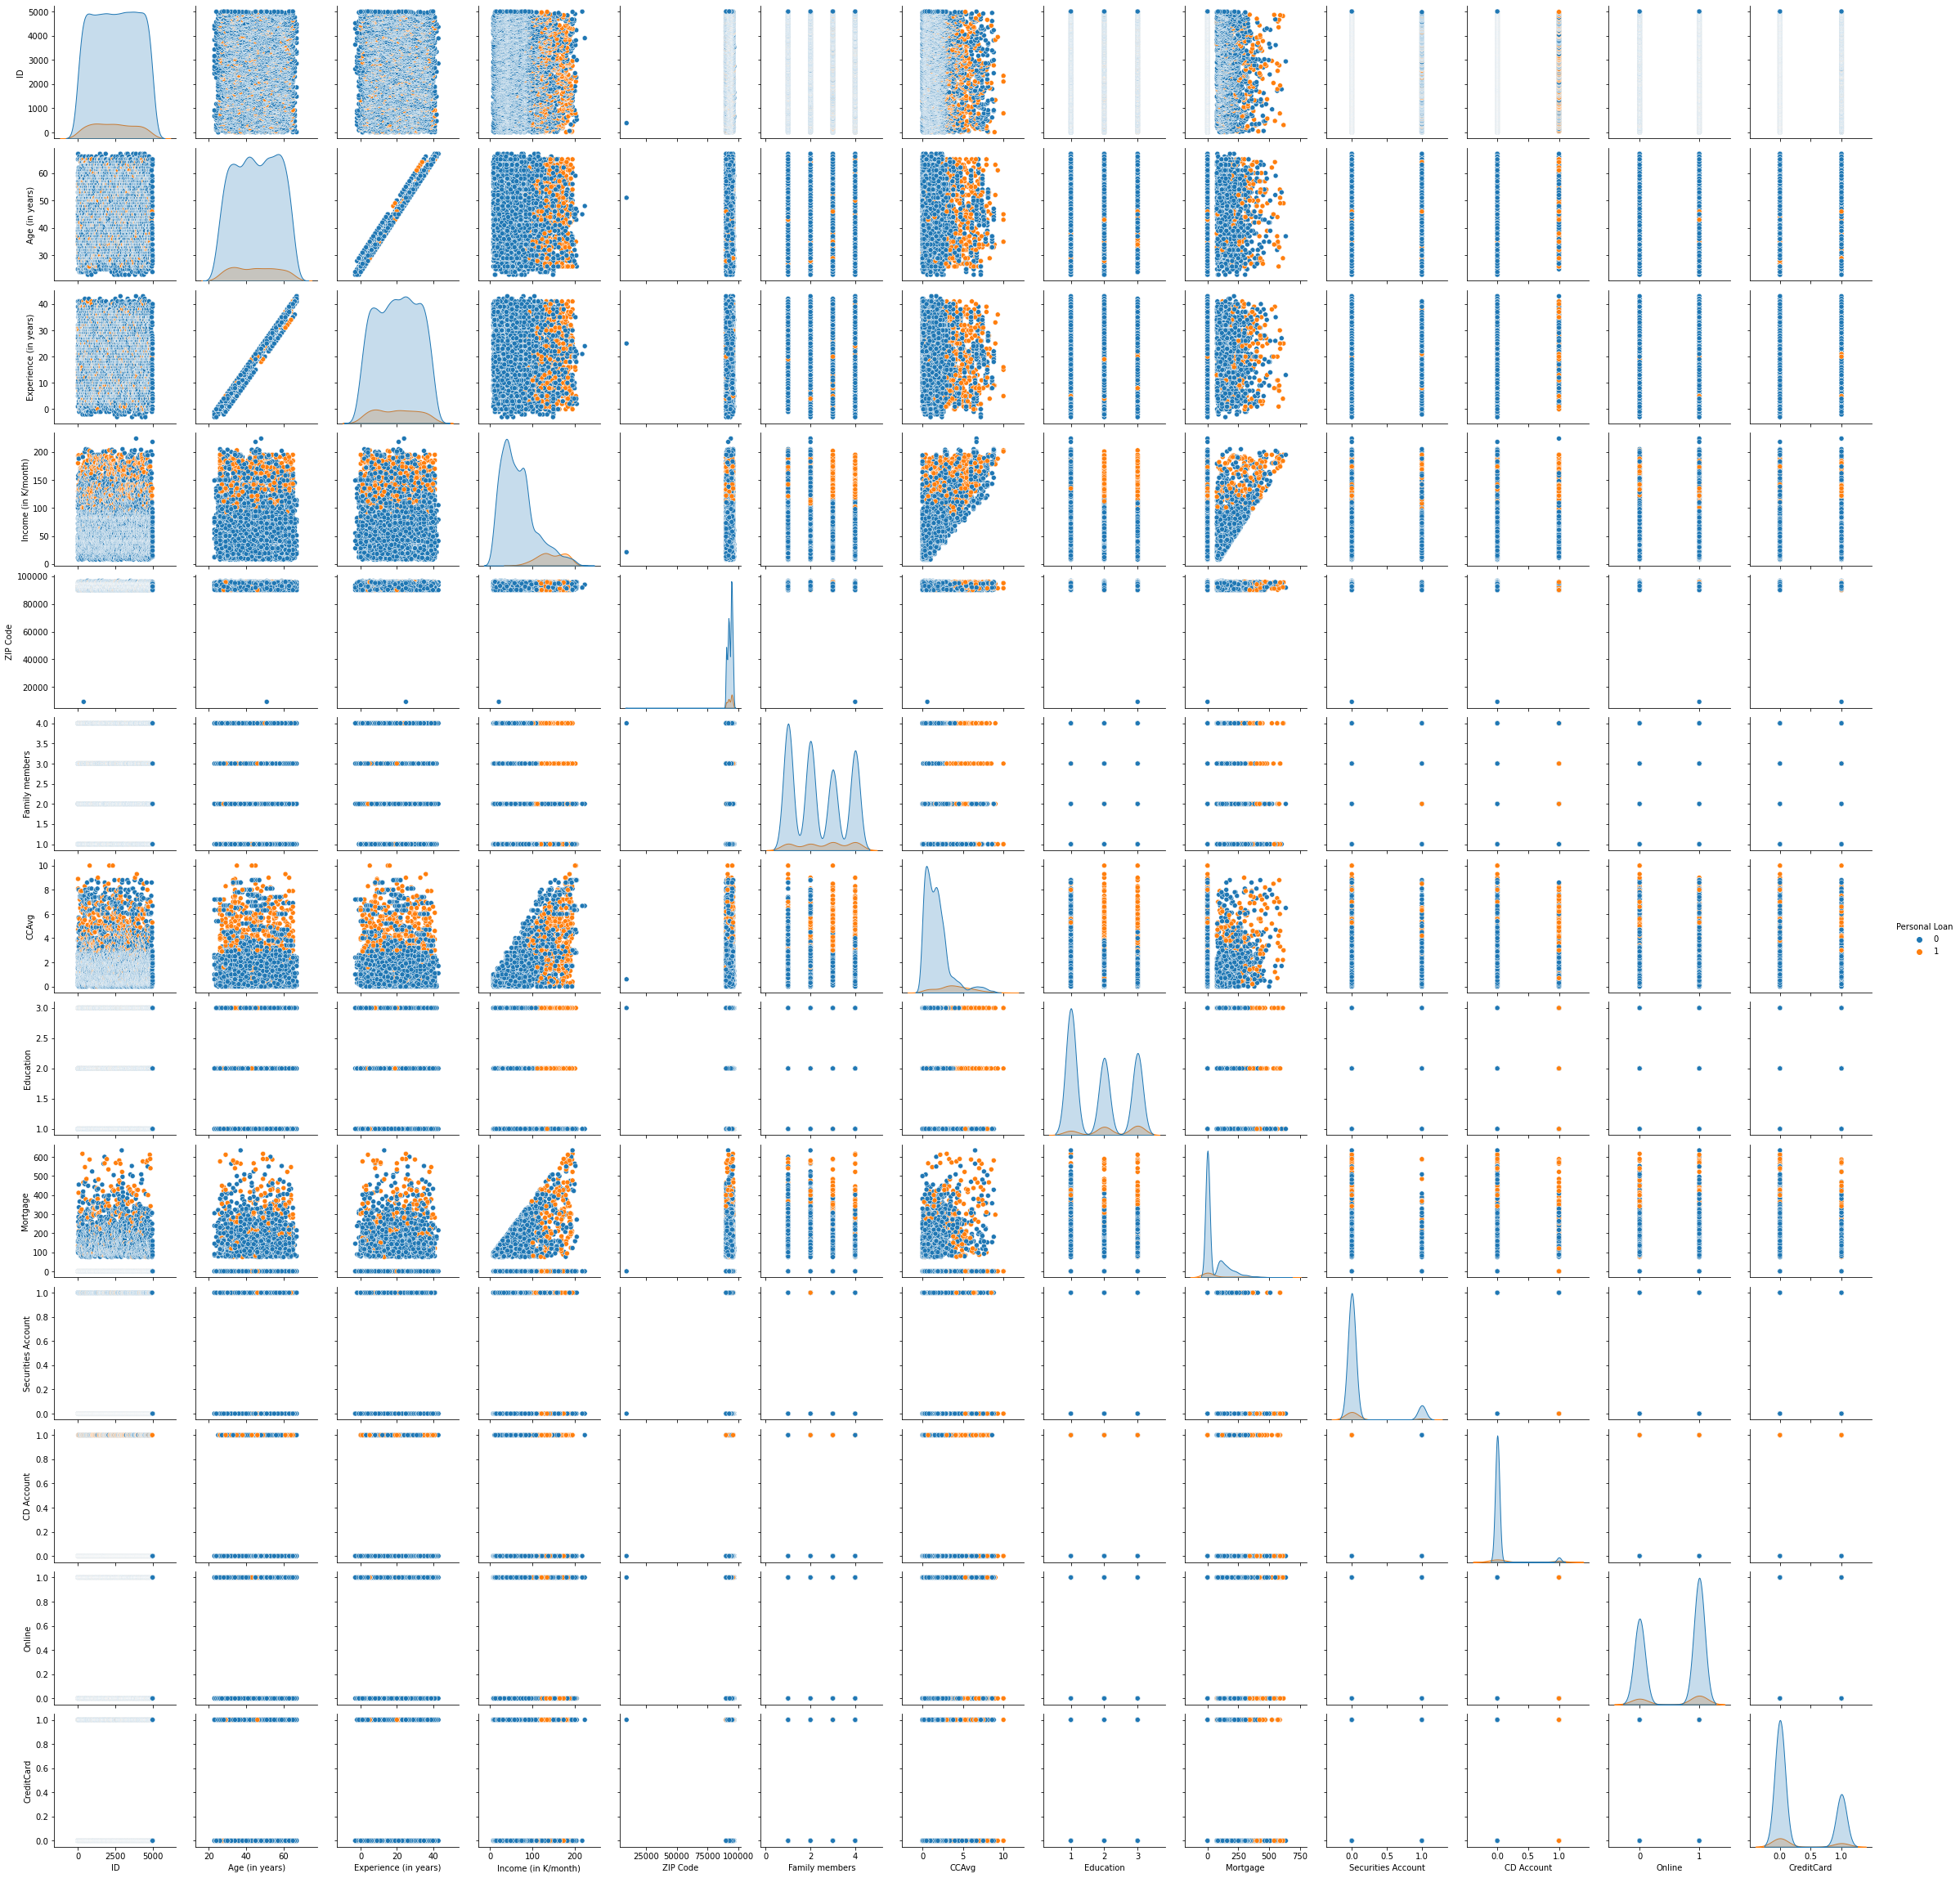

In [289]:
sns.pairplot(bank_df, diag_kind='kde', hue='Personal Loan')

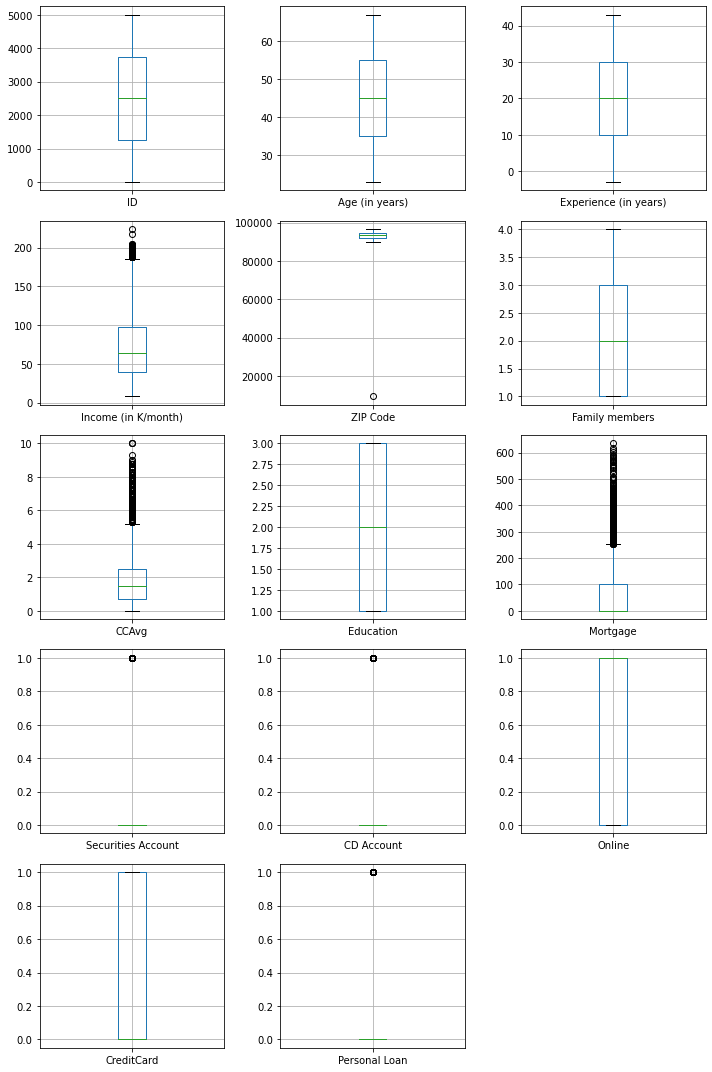

In [290]:
fig, axes =plt.subplots(5,3, figsize=(10,15))

for i, el in enumerate(list(bank_df.columns.values)[:]):
    a=bank_df.boxplot(el, ax=axes.flatten()[i])
    
fig.delaxes(axes[4,2])
plt.tight_layout()
plt.show()

In [291]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age (in years),5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience (in years),5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income (in K/month),5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family members,5000.0,2.392200,1.148148,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [292]:
# parwise correlation with dependent variables

bank_df.corr()["Personal Loan"]

ID                      -0.024801
Age (in years)          -0.007726
Experience (in years)   -0.007413
Income (in K/month)      0.502462
ZIP Code                 0.000107
Family members           0.060759
CCAvg                    0.366889
Education                0.136722
Mortgage                 0.142095
Securities Account       0.021954
CD Account               0.316355
Online                   0.006278
CreditCard               0.002802
Personal Loan            1.000000
Name: Personal Loan, dtype: float64

In [271]:
#Zip Code doesn't have any impact on personal Loan so going to drop Zip Code from loan_df

bank_df=bank_df.drop('ZIP Code', axis=1)

In [272]:
bank_df.groupby(['Personal Loan']).count()

,ID,Age (in years),Experience (in years),Income (in K/month),Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


3. Model the data using Logistic regression (4 points)

In [313]:
bank_df_T=bank_df.copy()
bank_df.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [314]:
y= bank_df_T[['Personal Loan']]

In [315]:
y.head()

,Personal Loan
0,0
1,0
2,0
3,0
4,0


In [319]:
X= bank_df_T.drop(['Personal Loan'], axis=1)
X=X.values

y=y.values
#y.shape
#X.shape

In [320]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=1)

In [328]:
# Fit the modell

regression_model= LogisticRegression()
regression_model.fit(X_train, y_train)
y_predict= regression_model.predict(X_test)

Find the accuracy of the model using confusion matrix

In [329]:
print ("Traning score", regression_model.score(X_train, y_train))

Traning score 0.9314285714285714


In [330]:
print ("Test score", regression_model.score(X_test, y_test))

Test score 0.9266666666666666


In [332]:
print (metrics.confusion_matrix(y_test, y_predict))

[[1322   29]
 [  81   68]]


In [333]:
print (metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1351
           1       0.70      0.46      0.55       149

    accuracy                           0.93      1500
   macro avg       0.82      0.72      0.76      1500
weighted avg       0.92      0.93      0.92      1500



Use K - NN model [Hint: Try different values of k] and compare the accuracy of this model with that of Logistic regression

In [337]:
for i in range (1,20,2):
    NNH=KNeighborsClassifier(n_neighbors=i)
    NNH.fit(X_train, y_train)
    predict_labels=NNH.predict(X_test)
    print ("K=", NNH.n_neighbors, "Training Score", NNH.score(X_train, y_train))
    print ("K=", NNH.n_neighbors, "Testing Score",NNH.score(X_test, y_test))

K= 1 Training Score 1.0
K= 1 Testing Score 0.872
K= 3 Training Score 0.9294285714285714
K= 3 Testing Score 0.898
K= 5 Training Score 0.9117142857142857
K= 5 Testing Score 0.902
K= 7 Training Score 0.9065714285714286
K= 7 Testing Score 0.9006666666666666
K= 9 Training Score 0.906
K= 9 Testing Score 0.9006666666666666
K= 11 Training Score 0.9057142857142857
K= 11 Testing Score 0.9006666666666666
K= 13 Training Score 0.9054285714285715
K= 13 Testing Score 0.9006666666666666
K= 15 Training Score 0.9054285714285715
K= 15 Testing Score 0.9006666666666666
K= 17 Training Score 0.9054285714285715
K= 17 Testing Score 0.9006666666666666
K= 19 Training Score 0.9054285714285715
K= 19 Testing Score 0.9006666666666666


In [338]:
# k=3 is giving the best score
NNH = KNeighborsClassifier(3)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
print("K = ",NNH.n_neighbors,"   Training Score = ",NNH.score(X_train, y_train),"   Testing Score = ",NNH.score(X_test, y_test))

K =  3    Training Score =  0.9294285714285714    Testing Score =  0.898
